In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

# Feature Engineering

## US credit default rate

In [21]:
# credit default rate US from 2007 to 2011
# source: https://www.federalreserve.gov/datadownload/Choose.aspx?rel=CHGDEL
cdr_us = pd.read_csv('../data/DRALACBN.csv')

In [22]:
cdr_us.rename(columns={'DATE':'date','DRALACBN':'default_rate'},inplace=True)

In [15]:
time_df=pd.read_csv('../data/loans_2007.csv')

/Users/torben/opt/anaconda3/envs/nf2/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
time_df = time_df[['issue_d','loan_status']]

In [18]:
time_df = time_df.drop('loan_status',axis=1)

,issue_d,target
0,Dec-2011,1.0
1,Dec-2011,0.0
2,Dec-2011,1.0
3,Dec-2011,1.0
4,Dec-2011,NaN
5,Dec-2011,1.0
6,Dec-2011,1.0
7,Dec-2011,1.0
8,Dec-2011,0.0
9,Dec-2011,0.0


In [19]:
time_df.dropna(inplace=True)

In [31]:
time_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41546 entries, 0 to 42535
Data columns (total 2 columns):
issue_d    41546 non-null datetime64[ns]
target     41546 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 973.7 KB


In [34]:
#time_test = time_df.groupby('issue_d').mean()

In [36]:
#time_test['target'] = 1- time_test['target']

In [38]:
# time_test = time_test.reset_index()

In [48]:
#time_test.target=time_test.target*100

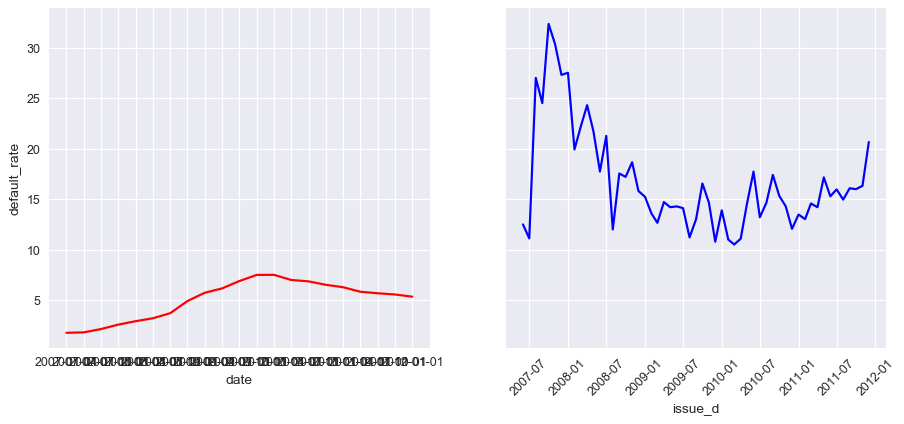

In [61]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5), dpi=90,sharey=True,)
f=sns.lineplot(x='date',y='default_rate',data=cdr_us,color='r',ax=ax1)
f=sns.lineplot(x='issue_d',y='target',data=time_test,color='b',ax=ax2)
plt.xticks(rotation=45);

## state by credit_total

In [63]:
# state/credit ratio
# --> how many credits credits and better bad-loan ratio